In [268]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [269]:
df0 = pd.read_pickle('preprocessed_data.pickle')

In [270]:
df0['date']=df0['INTERVAL_START'].dt.date

# visualization

In [271]:
df = df0[(df0['INTERVAL_START'] >= '2017-09-13 00:00:00') & (df0['INTERVAL_START'] <= '2017-09-16 00:00:00')]

In [272]:
df.head(10)

,INTERVAL_START,ServiceContractMethod,SucceededCount,BusinessErrorCount,TotalTime,AvgDuration,date
65755,2017-09-14,BillingDomain/CreditCardGateway/v001/ServiceCo...,716,0,3.207108,0.004500,2017-09-14
65756,2017-09-14,BillingDomain/TelBillDoc/v001/ServiceContracts...,26981,0,1644.263508,0.061095,2017-09-14
65757,2017-09-14,BillingDomain/TelBillDoc/v001/ServiceContracts...,17,1,0.109126,0.005455,2017-09-14
65758,2017-09-14,BillingDomain/UnitedDocument/v001/ServiceContr...,4,0,0.062400,0.016000,2017-09-14
65759,2017-09-14,BillingDomain/UnitedDocument/v001/ServiceContr...,1,0,0.124772,0.125000,2017-09-14
65760,2017-09-14,BillingDomain/UnitedDocument/v001/ServiceContr...,5,0,0.093581,0.017000,2017-09-14
65761,2017-09-14,BillingDomain/UnitedDocument/v001/ServiceContr...,1,0,0.000000,0.000000,2017-09-14
65762,2017-09-14,BillingDomain/UnitedDocument/v001/ServiceContr...,1,0,0.000000,0.000000,2017-09-14
65763,2017-09-14,FORIS.RIF/Convergent/IRifConvergent ReturnPhon...,36,0,25.974667,0.723500,2017-09-14
65764,2017-09-14,FORIS.ResourceInventory.ResourcesSettingsServi...,63,0,0.015605,0.000250,2017-09-14


In [273]:
df.groupby('date').count()

,INTERVAL_START,ServiceContractMethod,SucceededCount,BusinessErrorCount,TotalTime,AvgDuration
date,,,,,,
2017-09-14,22564,22564,22564,22564,22564,22564
2017-09-15,22153,22153,22153,22153,22153,22153


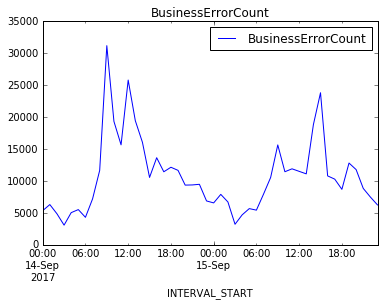

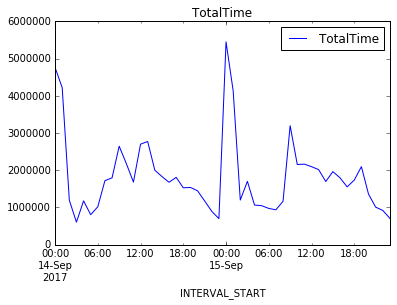

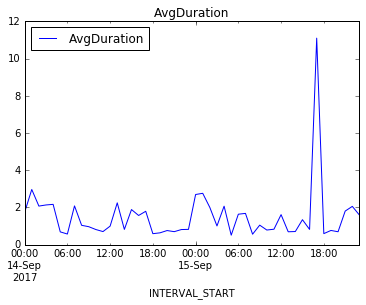

In [274]:
groups = df.groupby('INTERVAL_START')

groups.agg({'BusinessErrorCount' : np.sum}).plot(title='BusinessErrorCount')
groups.agg({'TotalTime' : np.sum}).plot(title='TotalTime')
groups.agg({'AvgDuration' : np.mean}).plot(title='AvgDuration')


# building linear model



In [275]:
test_groups = df0[(df0['INTERVAL_START'] >= '2017-09-14 19:00:00') & (df0['INTERVAL_START'] <= '2017-09-15 00:00:00')].groupby('INTERVAL_START')
testData = test_groups.agg({'TotalTime' : np.sum})
testData = testData.reset_index()
testData.head(10)

,INTERVAL_START,TotalTime
0,2017-09-14 19:00:00,1.539189e+06
1,2017-09-14 20:00:00,1.449222e+06
2,2017-09-14 21:00:00,1.175704e+06
3,2017-09-14 22:00:00,8.963100e+05
4,2017-09-14 23:00:00,7.005641e+05
5,2017-09-15 00:00:00,5.452566e+06


In [276]:
from sklearn import linear_model
regression_model = linear_model.LinearRegression()

#train on all but 1
regression_model.fit(X = pd.DataFrame(testData.index[:-1])
                     ,y = testData["TotalTime"][:-1])

print(regression_model.intercept_)
print(regression_model.coef_)

1598230.08825
[-223016.1677119]


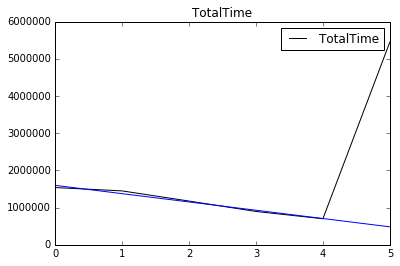

In [277]:
testData.plot(title='TotalTime',color="black")
train_prediction = regression_model.predict(X = pd.DataFrame(testData.index))
plt.plot(pd.DataFrame(testData.index),  # Explanitory variable
         train_prediction,  # Predicted values
         color="blue")

In [280]:
print(train_prediction[-1])
print(list(testData['TotalTime'])[-1])
print("Value/prediction ratio:")
print(list(testData['TotalTime'])[-1]/train_prediction[-1])

483149.249687
5452565.57495
Value/prediction ratio:
11.2854683692


# linear model for method

In [330]:
#Foris/TelCrm/CustomerManagement/v1/IServiceProvider GetServiceProviderHistory
groups = df0.groupby('ServiceContractMethod')
group = groups.get_group('Foris/TelCrm/CustomerManagement/v1/IServiceProvider GetServiceProviderHistory')
group.head()

,INTERVAL_START,ServiceContractMethod,SucceededCount,BusinessErrorCount,TotalTime,AvgDuration,date
370,2017-03-08 00:00:00,Foris/TelCrm/CustomerManagement/v1/IServicePro...,501410,0,164325.592837,0.327692,2017-03-08
1193,2017-03-08 01:00:00,Foris/TelCrm/CustomerManagement/v1/IServicePro...,498777,0,346924.173252,0.695692,2017-03-08
2000,2017-03-08 02:00:00,Foris/TelCrm/CustomerManagement/v1/IServicePro...,494006,0,206002.771085,0.417154,2017-03-08
2741,2017-03-08 03:00:00,Foris/TelCrm/CustomerManagement/v1/IServicePro...,417326,0,354892.545689,0.850385,2017-03-08
3510,2017-03-08 04:00:00,Foris/TelCrm/CustomerManagement/v1/IServicePro...,431466,0,99169.778279,0.229923,2017-03-08


In [335]:
import datetime
test_groups = group[(group['INTERVAL_START'] >= datetime.datetime.strptime('2017-09-15 00:00:00', "%Y-%m-%d %H:%M:00") - datetime.timedelta(hours=5) ) 
                    & (group['INTERVAL_START'] <= '2017-09-15 00:00:00')].groupby('INTERVAL_START')
testData = test_groups.agg({'TotalTime' : np.sum})
testData = testData.reset_index()
testData.head(10)

,INTERVAL_START,TotalTime
0,2017-09-14 19:00:00,75305.325023
1,2017-09-14 20:00:00,73286.249250
2,2017-09-14 21:00:00,60659.629710
3,2017-09-14 22:00:00,43248.238802
4,2017-09-14 23:00:00,39742.557102
5,2017-09-15 00:00:00,99198.180634


In [340]:
testData["TotalTime"][:-1].mean()

58448.399977400004

In [336]:
from sklearn import linear_model
regression_model = linear_model.LinearRegression()

#train on all but 1
regression_model.fit(X = pd.DataFrame(testData.index[:-1])
                     ,y = testData["TotalTime"][:-1])
train_prediction = regression_model.predict(X = pd.DataFrame(testData.index))
print(regression_model.intercept_)
print(regression_model.coef_)

78681.1092354
[-10116.354629]


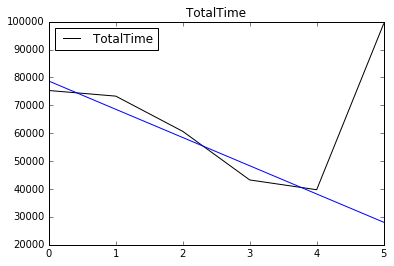

In [337]:
testData.plot(title='TotalTime',color="black")
plt.plot(pd.DataFrame(testData.index),  # Explanitory variable
         train_prediction,  # Predicted values
         color="blue")

In [338]:
print(train_prediction[-1])
print(list(testData['TotalTime'])[-1])
print("Value/prediction ratio:")
print(list(testData['TotalTime'])[-1]/train_prediction[-1])

28099.3360904
99198.180634
Value/prediction ratio:
3.53026777269
